# Test Types
In this visuals we want to discorer the following

* Visualize what test types are being used the most.
* Visualize what test types give the most issues(blast and linter)

importing libararies

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data

In [32]:
read_linting_results = pd.read_csv('data/blast_linting_results.csv')
read_review_test_results = pd.read_csv('data/blast_review_test_results.csv')
read_reviews = pd.read_csv('data/blast_reviews.csv')
data_tests = pd.read_csv('data/blast_tests.csv')
read_code_blast_tests = pd.read_csv('data/code_blast_tests.csv')
read_exercises = pd.read_csv('data/exercises.csv')
data_implementation_exercise = pd.read_csv('data/implementation_exercise.csv')

# Cleaned data

In [33]:
data_linting_result_warning= read_linting_results[['blast_review_id', 'file_name', 'message', 'type', 'line', 'column']]
data_linting_result = data_linting_result_warning[data_linting_result_warning['type'].str.lower().isin(['error'])]

data_review_test_results = read_review_test_results[['blast_review_id', 'test_id', 'human_error_message', 'test_language']]

data_reviews = read_reviews[['id', 'implementation_id', 'state', 'created_on']]

data_exercises = read_exercises[['id', 'title', 'files_to_turn_in']]

data_code_blast_tests = read_code_blast_tests[['id', 'exercise_id', 'title', 'test_type', 'created_on', 'language']]

Counting the tests

In [34]:
unique_counts = data_tests["test_type"].value_counts()
unique_counts

PHP_UNIT    410
PYTHON       99
NODE_JS      57
C_SHARP       1
Name: test_type, dtype: int64

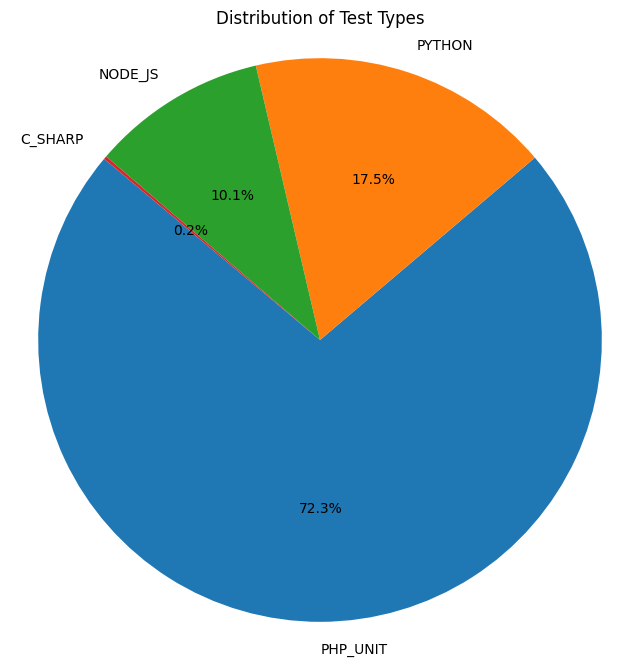

In [35]:
# Assuming you have already calculated unique_counts using value_counts()
unique_counts = data_tests["test_type"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(unique_counts, labels=unique_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Test Types")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart
plt.show()


Kijk naar de structuur van de blast errors, ze zullen de zelfde structuur hebben als het gaat om linting of echt een opdracht

Visualize what test types give the most issues(blast and linter)

Finding the unique values

In [36]:
# Extracting language names from 'file_name' and counting occurrences
language_counts = data_linting_result['file_name'].str.extract(r'\.(\w+)$').loc[:, 0].value_counts()

# Displaying counts of each language
print(language_counts)


php     486192
html    326956
js      251930
css      98299
sql      78774
py        3669
htm       3231
inc          5
Name: 0, dtype: int64


Making the visual more specific by sepporate the linter and blast issues

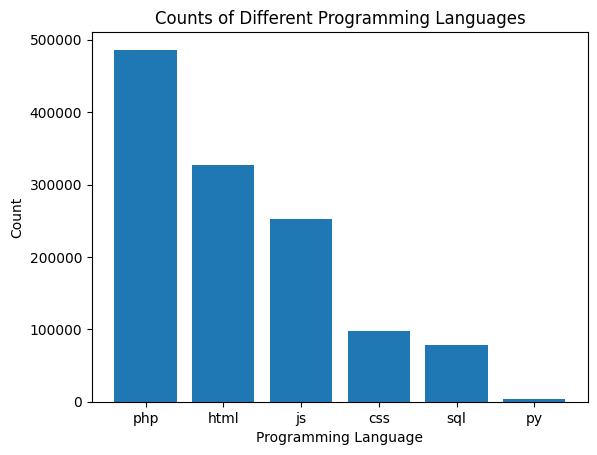

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already extracted language names and counts using the regex approach
language_counts = data_linting_result['file_name'].str.extract(r'\.(\w+)$').loc[:, 0].value_counts()

# Filter the dataset for different language types
languages_to_plot = ['php', 'html', 'sql', 'js', 'css', 'py']
filtered_counts = language_counts[language_counts.index.isin(languages_to_plot)]

# Plot the counts
plt.bar(filtered_counts.index, filtered_counts)
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.title('Counts of Different Programming Languages')
plt.show()
